# 11. 時系列データと自然言語処理
11章では、時系列解析と自然言語処理について解説していきます。講義の前半では時系列解析について、後半では自然言語処理について扱います。

## 11.5. 本講義の目的



今回の目標は、

1.   **実務や研究で自然言語データの解析をする際に対応できる知識を会得する**
2.   **実際に自然言語処理のためのプログラムが書けるようになる**
2.   **大規模言語モデル（LLM）の要素技術がわかる**


ことです。

口コミやアンケートなど、実務でもよく見られる自然言語データですが、GCIでこれまで学んできた数値データの解析とは違い、機械学習を適用するには特殊なアプローチが必要です。
また、ChatGPTなどの大規模言語モデル（LLM）のベースとなっている技術でもあるので、最新のLLMに関する論文を読んだり研究したりする際には、本講義の知識は必要になります。

今回の講義で、自然言語処理の入り口に立ってみましょう！

## 11.6. 自然言語処理の概要

今までの講座で扱ってきたデータセットは、定性的・定量的なデータを数値として処理することで容易に扱うことができました。あるデータはある他のデータと独立した関係なので、前後のデータによって意味が変化することはありません。

しかしテキストデータは、単語の位置関係や単語同士の係り受けによって大きく意味が変化します。またコンピュータに直接単語を入力することができないため、何らかの適切な数値形式に変換する必要があります。本講義では、テキストデータの処理に使われる基礎的な手法を学びます。
<br><br>

---

自然言語処理について<br><br>
自然言語とは、私たちが日常的に話したり書いたりする日本語や英語など言語を表しており、人間の歴史の中で自然に発達しました。

統計学やコンピュータサイエンスなどの様々な技術を用いて、自然言語を解析・処理する一連の技術を自然言語処理といいます。近年、ディープラーニングを自然言語処理に応用する研究が活発になり、様々なタスクにおいて急速に精度が向上されています。

本教材では、自然言語処理の基礎的な部分からChatGPTの基礎技術まで幅広く扱いますので、自然言語処理全体のイメージを掴みましょう。<br><br>

---

自然言語処理タスクにおける一部の例をご紹介します。

<div align="left">

| タスク | 概要 |
| ---- | ---- |
| 文章分類 | 文章のジャンルの分類を行う |
| 自動要約 | 文章の要点を抽出し、より短い自然言語表現を生成する |
| 機械翻訳       | 異なる言語間の翻訳を行う                                      |
| 自動要約       | 文章の要点を抽出し、より短い自然言語表現を生成する                  |
| 質問応答       | 質問を入力すると、適切な単語や文章を出力する                      |
| 固有表現抽出     | 人名や地名などの固有名詞の抽出を行う                              |
| 含有関係認識     | 二つの文章が与えられ、片方がもう片方に含意するかを認識する           |
| 感情分析       | ある文章のポジティブ・ネガティブの判別を行う                        |

</div><br>

[Natural Language Processing](https://paperswithcode.com/area/natural-language-processing)のジャンルには、587ものタスクがありますので興味がある方はぜひ調べてみてください。

このようなタスクを行うための技術の歴史をたどってみましょう。1980年代に、単語の「意味」を表すために、人手での定義によるシソーラスが提案されました。シソーラスとは、「同じ意味の単語」や「意味の近い単語」を同じグループに分類した類似辞書です。上記のようなルールベースの方法が当時の自然言語処理の主流でしたが、実用の耐えない精度でした。その一方で、インターネットの発展やコンピュータの処理能力の向上により、コーパス・データベースの蓄積が進むことで、自然言語処理の土台が構築されていきました。2010年代では、深層学習の発展により膨大なデータとコンピュータリソースを用いた自然言語処理が主流となりました。RNN・LSTM・Attention・Transformerといった様々なモデルが提案され、驚異的な進歩で精度が向上しています。

近年の成果をご紹介する前に、モデルの評価に用いるベンチマーク指標「[GLUE](https://gluebenchmark.com/)」をご紹介します。 GLUEは、9つの英語の言語処理タスクの精度を総合的に評価する指標です。9つのタスクは以下の通りです。<br>

<div align="left">

| タスク | 概要 |
| ---- | ---- |
| CoLA      | 英語の文法的な正しさを判定する|
| SST-2     | 映画レビューがポジティブかネガティブかを判定する|
| MRPC      | 2文が同じ意味かどうかを判定する|
| STS-B     | ニュースの見出しの類似度を5段階で評価する|
| QQP       | 2つの質問が同じ意味かどうかを判定する|
| MNLI-m/MNLI-mm   | 2文の含意関係（含意、矛盾、中立）を判定する|
| SQuAD     | 文脈から質問の回答を抽出する|
| QNLI      | 質問文の解答が、問題文中に含まれているかどうかを判定する|
| RTE| 2つの文の含意関係（含意、含意でない）を判定する|
| WNLI| 代名詞置き換えた名詞が、元の文章の指し示す名詞であるかどうかを判定する

</div>

（2019年には、より難しい文章を含んだ「[SuperGLUE](https://super.gluebenchmark.com/)」が公開されました）

このGLUEスコアの更新過程をご紹介します。学習に使用するコーパスやモデルの大規模化によって、GLUEスコアは近年急速に向上しています。


![スライド1.jpeg](https://camo.qiitausercontent.com/3d544b59e28226768502beede43c20df889c7f2f/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e61702d6e6f727468656173742d312e616d617a6f6e6177732e636f6d2f302f3237363232332f37353230303031632d643732302d353934622d326564632d6631393564323532646234392e706e67)
[参照元：歴代の自然言語処理モデルのスコア推移](https://qiita.com/artisanbaggio/items/2feed4d473b340489a7a#%E6%9C%80%E5%85%88%E7%AB%AF%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E3%82%B9%E3%82%B3%E3%82%A2%E5%A4%89%E9%81%B7)



## 11.7 自然言語処理

### 11.7.1 形態素解析

形態素解析とは、自然言語処理の一部で、自然言語で書かれた文章を言語上で意味を持つ最小単位である形態素に分け、それぞれの品詞や変化などを判別することです。

形態素解析に学ぶにあたって基本的な用語をおさえましょう。
- 形態素
  - 意味を持つ最小単位の表現要素
  - 例) 「私」「は」「学校」「で」「数学」「を」「学び」「ます」「。」

- 形態素解析
  - コンピュータを利用して、文章を最小単位である形態素に分割すること
  - 例) 「私は学校で数学を学びます。」 → 「私」「は」「学校」「で」「数学」「を」「学び」「ます」「。」
- トークナイザー (Tokenizer)
  - 形態素解析によって、文章を形態素に分割すること
  - 最小単位に分割された形態素をトークン(Token)と呼び、各トークンに単語IDが振られる
  - 例) 「私」「は」「学校」「で」「数学」「を」「学び」「ます」「。」 <br>→ {私:0,　は:1,　学校:2,　で:3,　数学:4,　を:5,　学び:6,　ます:7,　。:8}
- コーパス (Corpus)
  - 自然言語処理の研究に用いるため、自然言語の文章を構造化し大規模に集積したもの
- stopword
  - 文章の特徴を捉えるのに役立たない形態素
  - 例) 「を」、「です」、「それ」、「。」
- stemming (ステミング)
  - 複数の言い回しが存在する品詞の原型を取り出すこと
  - 例) 「読み」, 「読め」 → 「読む」

<br>

次に、日本語の形態素解析でよく使われる「MeCab」を利用して、一連の流れを実装してみましょう。


#### MeCab
日本語の形態素解析ができる「MeCab」というライブラリを使います。（[公式ドキュメント](https://taku910.github.io/mecab/)）

形態素解析エンジン「MeCab」は、後にGoogleで日本語入力システムの開発に携わることとなる工藤拓氏が、奈良先端科学技術大学院大学に在籍していた際に公開した形態素解析分析ソフトウェアです。

> MeCabは 京都大学情報学研究科−日本電信電話株式会社コミュニケーション科学基礎研究所 共同研究ユニットプロジェクトを通じて開発されたオープンソース 形態素解析エンジンです。
（中略）
ちなみに和布蕪(めかぶ)は, 作者の好物です。

（出典：[MeCab公式サイト](https://taku910.github.io/mecab/)）

MeCabを利用するにあたって、まずはインストールしましょう。

In [ ]:
# MeCabのインストール
%%capture
!pip install mecab-python3 unidic-lite
!apt-get install mecab-ipadic-utf8

では実際にMeCabを利用して、文章の形態素解析を行なってみましょう。

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import MeCab

import warnings
warnings.simplefilter('ignore')

In [ ]:
sample_txt = '明日の天気は晴れのち曇りです。'

# デフォルト
m = MeCab.Tagger()
print("デフォルト:\n", m.parse(sample_txt))

デフォルト:
 明日	アス	アス	明日	名詞-普通名詞-副詞可能			2,0
の	ノ	ノ	の	助詞-格助詞			
天気	テンキ	テンキ	天気	名詞-普通名詞-一般			1
は	ワ	ハ	は	助詞-係助詞			
晴れ	ハレ	ハレル	晴れる	動詞-一般	下一段-ラ行	連用形-一般	2
のち	ノチ	ノチ	後	名詞-普通名詞-副詞可能			0,2
曇り	クモリ	クモリ	曇り	名詞-普通名詞-一般			3
です	デス	デス	です	助動詞	助動詞-デス	終止形-一般	
。			。	補助記号-句点			
EOS



In [ ]:
# 分かち書き
wakati = MeCab.Tagger("-Owakati")
print("分かち書き:\n", wakati.parse(sample_txt))

分かち書き:
 明日 の 天気 は 晴れ のち 曇り です 。 



In [ ]:
# chasen
chasen = MeCab.Tagger("-d /var/lib/mecab/dic/ipadic-utf8 -Ochasen")
print("Mecab:\n", chasen.parse(sample_txt))

Mecab:
 明日	アシタ	明日	名詞-副詞可能		
の	ノ	の	助詞-連体化		
天気	テンキ	天気	名詞-一般		
は	ハ	は	助詞-係助詞		
晴れ	ハレ	晴れ	名詞-一般		
のち	ノチ	のち	名詞-副詞可能		
曇り	クモリ	曇る	動詞-自立	五段・ラ行	連用形
です	デス	です	助動詞	特殊・デス	基本形
。	。	。	記号-句点		
EOS



MeCabを利用することで、日本語の文章を形態素に分割することができました。<br><br>
次に複数の文章を用意し、前処理を行った後に分かち書きで形態素解析を行います。前処理には[re](https://docs.python.org/ja/3/library/re.html)と呼ばれる正規表現の操作を行うモジュールから、文章中の不適切な文字やノイズを除去することができます。

In [ ]:
import re

In [ ]:
# 不適切な文章を用意
corpus_lists = [
    "私は【Apple製】のパソコン　を持っています。",
    "[昨日、ペンを　10本 買いました。]",
    "明日の天気は(晴れ) のち(曇り)ですよ。",
]
wakati_lists = []
wakati = MeCab.Tagger("-Owakati")

def preprocessing(text):
  text = text.lower()                  # 大文字を小文字に変換
  text = re.sub(r'\d+', '0', text)       # 数字を0に変換
  text = re.sub(r'[【】]', ' ', text)       # 【】の除去
  text = re.sub(r'[（）()]', ' ', text)     # （）の除去
  text = re.sub(r'[［］\[\]]', ' ', text)   # ［］の除去
  text = re.sub(r' ', '', text)           # 空白の除去
  text = re.sub(r'　', '', text)           # 空白の除去

  return text

for text in corpus_lists:
  # 前処理
  row_text = text
  text = preprocessing(text)
  print("修正前：",row_text)
  print("修正後：",text)

  # 形態素解析
  wakati_text = wakati.parse(text)
  wakati_text = wakati_text.split(" ")[:-1]
  wakati_lists.append(wakati_text)
  print("形態素：",wakati_text, "\n")

修正前： 私は【Apple製】のパソコン　を持っています。
修正後： 私はapple製のパソコンを持っています。
形態素： ['私', 'は', 'apple', '製', 'の', 'パソコン', 'を', '持っ', 'て', 'い', 'ます', '。'] 

修正前： [昨日、ペンを　10本 買いました。]
修正後： 昨日、ペンを0本買いました。
形態素： ['昨日', '、', 'ペン', 'を', '0', '本', '買い', 'まし', 'た', '。'] 

修正前： 明日の天気は(晴れ) のち(曇り)ですよ。
修正後： 明日の天気は晴れのち曇りですよ。
形態素： ['明日', 'の', '天気', 'は', '晴れ', 'のち', '曇り', 'です', 'よ', '。'] 



### 11.7.2 手法

#### BoW
BoW (Bag of Words)は、古典的なテキスト表現手法で、テキストの**順番**や**文脈**を無視して単語の集合体として表現します。基本的な考えとして、データセットのあるクラスに属するテキストは、一意の集合によって特徴づけられと仮定することです。二つのテキストがほぼ同じ単語を含む場合、それらは同じクラスに属します。<br><br>

![image](https://cdn-media-1.freecodecamp.org/images/1*j3HUg18QwjDJTJwW9ja5-Q.png)

参照元：[Text classification and prediction using the Bag Of Words approach](https://www.freecodecamp.org/news/text-classification-and-prediction-using-bag-of-words-8aeb1396cded/)


In [ ]:
wakati_lists

[['私', 'は', 'apple', '製', 'の', 'パソコン', 'を', '持っ', 'て', 'い', 'ます', '。'],
 ['昨日', '、', 'ペン', 'を', '0', '本', '買い', 'まし', 'た', '。'],
 ['明日', 'の', '天気', 'は', '晴れ', 'のち', '曇り', 'です', 'よ', '。']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(binary=True, analyzer=lambda x:x) # binary : 出現頻度の考慮
bow_text = count_vec.fit_transform(wakati_lists)

In [ ]:
# 単語ID
print("単語ID")
print(sorted(count_vec.vocabulary_.items()), "\n")

単語ID
[('0', 0), ('apple', 1), ('、', 2), ('。', 3), ('い', 4), ('た', 5), ('て', 6), ('です', 7), ('の', 8), ('のち', 9), ('は', 10), ('まし', 11), ('ます', 12), ('よ', 13), ('を', 14), ('パソコン', 15), ('ペン', 16), ('天気', 17), ('持っ', 18), ('明日', 19), ('昨日', 20), ('晴れ', 21), ('曇り', 22), ('本', 23), ('私', 24), ('製', 25), ('買い', 26)] 



In [ ]:
# BoW
print("BoW")
for i, text in enumerate(wakati_lists):
  print(f"文章{i+1} {wakati_lists[i]}\n{bow_text[i].toarray()}\n")

BoW
文章1 ['私', 'は', 'apple', '製', 'の', 'パソコン', 'を', '持っ', 'て', 'い', 'ます', '。']
[[0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0]]

文章2 ['昨日', '、', 'ペン', 'を', '0', '本', '買い', 'まし', 'た', '。']
[[1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1]]

文章3 ['明日', 'の', '天気', 'は', '晴れ', 'のち', '曇り', 'です', 'よ', '。']
[[0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0]]



In [ ]:
# BoW実装
corpus_lists = [
    "私は【Apple製】のパソコン　を持っています。",
    "[昨日、ペンを　10本 買いました。]",
    "明日の天気は(晴れ) のち(曇り)ですよ。",
]
wakati = MeCab.Tagger("-Owakati")

def preprocessing(text):
  text = text.lower()                  # 大文字を小文字に変換
  text = re.sub(r'\d+', '0', text)       # 数字を0に変換
  text = re.sub(r'[【】]', ' ', text)       # 【】の除去
  text = re.sub(r'[（）()]', ' ', text)     # （）の除去
  text = re.sub(r'[［］\[\]]', ' ', text)   # ［］の除去
  text = re.sub(r' ', '', text)           # 空白の除去
  text = re.sub(r'　', '', text)           # 空白の除去

  return text

word_to_id = {} # 単語辞書
count = 0

# 単語辞書作成
for text in corpus_lists:
  # 前処理
  text = preprocessing(text)
  wakati_text = wakati.parse(text)
  wakati_text = wakati_text.split(" ")[:-1]

  for word in wakati_text:
    # Word to ID
    if word not in word_to_id.keys():
      word_to_id[word] = count # wordが単語辞書にない場合、追加
      count += 1

# BoW
bow_text = []

for text in corpus_lists:
  text = preprocessing(text)
  wakati_text = wakati.parse(text)
  wakati_text = wakati_text.split(" ")[:-1]
  wakati_text = [1 if word in wakati_text else 0 for word in word_to_id] # 文章中に単語辞書の中の単語がある場合、1
  bow_text.append(wakati_text)

# 単語ID
print("単語ID")
print(word_to_id, "\n")

# 結果
for i, text in enumerate(bow_text):
  print(f"文章{i+1}  {corpus_lists[i]} : \n{bow_text[i]}\n")

単語ID
{'私': 0, 'は': 1, 'apple': 2, '製': 3, 'の': 4, 'パソコン': 5, 'を': 6, '持っ': 7, 'て': 8, 'い': 9, 'ます': 10, '。': 11, '昨日': 12, '、': 13, 'ペン': 14, '0': 15, '本': 16, '買い': 17, 'まし': 18, 'た': 19, '明日': 20, '天気': 21, '晴れ': 22, 'のち': 23, '曇り': 24, 'です': 25, 'よ': 26} 

文章1  私は【Apple製】のパソコン　を持っています。 : 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

文章2  [昨日、ペンを　10本 買いました。] : 
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

文章3  明日の天気は(晴れ) のち(曇り)ですよ。 : 
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]



BoWでは、同じ単語を含む文章は、全く異なる単語を含む文章と比べてベクトル空間におけるベクトル表現が近くなります。<br>

上の例では、文章1「I have apple computer」と「This is my pen」の間の距離は0であるのに対し、文章1「I have apple computer」と文章3「He has apple computer」の間の距離は2となります。<br>

以上のようにBoWで得られるベクトル空間は、文章の意味的な類似性を得ることができます。
<br><br>

---
<br>

しかしBoWは、単語の頻出のみで文章をベクトル表現しようとするため、全ての文章に出現する単語と、一部の文章にしか出現しない珍しい単語をうまく考慮することができません。次のTF-IDFは、各単語ごとに重要度という評価指標を計算することで、出現頻度のみならず、他の文章で出現頻度が低いレア度の高い単語も考慮することができます。
<br><br>

#### TF-IDF
TF-IDFでは、BoWと同様にユークリッド距離やコサイン類似度などの類似性指標を用いることで、二つの文章における類似性を計算することができます。またTF-IDFはある単語の重要性を定量化することを目的としているため、文章間の類似性を捉えるという点ではBoWよりも優れたベクトル化手法であると言えます。
<br>

TF-IDF (Term Frequency - Inverse Document Frequency)は「Term Frequency（単語の出現頻度）」と「Inverse Document Frequency（逆文書頻度）」の積を単語の重要度とします。

単語を$w$、$n$個の文章を$doc_i$($i = 1, 2, \cdots, n $)と表すと、$doc_i$における$w$のTerm Frequency（単語の出現頻度）とInverse Document Frequency（逆文書頻度）は次のように定義されます。

- Term Frequency（単語の出現頻度）
$doc_i$の総単語数に対する、$w$の出現回数の割合<br>
$
\begin{align}
\mathrm{TF}(doc_i, w) = \frac{doc_iにwが出現する回数}{doc_iの総単語数}
\end{align}
$

- Inverse Document Frequency（逆文書頻度）
文書の総数に対する、$w$が出現する文書数の割合の逆数（に対して対数をとったもの）<br>
$
\begin{align}
\mathrm{IDF}(w) = \log \frac{文書総数}{wが出現する文書数}
\end{align}
$

- TF-IDF
TF値とIDF値の積から単語の重要度を計算<br>
$
\begin{align}
\mathrm{TF-IDF}(doc_i, w) = \mathrm{TF}(doc_i, W) \times \mathrm{IDF}(w)
\end{align}
$

In [ ]:
wakati_lists

[['私', 'は', 'apple', '製', 'の', 'パソコン', 'を', '持っ', 'て', 'い', 'ます', '。'],
 ['昨日', '、', 'ペン', 'を', '0', '本', '買い', 'まし', 'た', '。'],
 ['明日', 'の', '天気', 'は', '晴れ', 'のち', '曇り', 'です', 'よ', '。']]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x:x)
tfidf_text = vectorizer.fit_transform(wakati_lists)

In [ ]:
# 単語ID
print("単語ID")
print(sorted(vectorizer.vocabulary_.items()), "\n")

単語ID
[('0', 0), ('apple', 1), ('、', 2), ('。', 3), ('い', 4), ('た', 5), ('て', 6), ('です', 7), ('の', 8), ('のち', 9), ('は', 10), ('まし', 11), ('ます', 12), ('よ', 13), ('を', 14), ('パソコン', 15), ('ペン', 16), ('天気', 17), ('持っ', 18), ('明日', 19), ('昨日', 20), ('晴れ', 21), ('曇り', 22), ('本', 23), ('私', 24), ('製', 25), ('買い', 26)] 



In [ ]:
# TF-IDF
print("TF-IDF")
for i, text in enumerate(wakati_lists):
  print(f"文章{i+1} {wakati_lists[i]}\n{tfidf_text[i].toarray()}\n")

TF-IDF
文章1 ['私', 'は', 'apple', '製', 'の', 'パソコン', 'を', '持っ', 'て', 'い', 'ます', '。']
[[0.         0.31490752 0.         0.18598945 0.31490752 0.
  0.31490752 0.         0.23949528 0.         0.23949528 0.
  0.31490752 0.         0.23949528 0.31490752 0.         0.
  0.31490752 0.         0.         0.         0.         0.
  0.31490752 0.31490752 0.        ]]

文章2 ['昨日', '、', 'ペン', 'を', '0', '本', '買い', 'まし', 'た', '。']
[[0.33468921 0.         0.33468921 0.19767284 0.         0.33468921
  0.         0.         0.         0.         0.         0.33468921
  0.         0.         0.25453977 0.         0.33468921 0.
  0.         0.         0.33468921 0.         0.         0.33468921
  0.         0.         0.33468921]]

文章3 ['明日', 'の', '天気', 'は', '晴れ', 'のち', '曇り', 'です', 'よ', '。']
[[0.         0.         0.         0.20251264 0.         0.
  0.         0.34288371 0.2607719  0.34288371 0.2607719  0.
  0.         0.34288371 0.         0.         0.         0.34288371
  0.         0.34288371 0.     

In [ ]:
# TF-IDF実装
from gensim import corpora, matutils

corpus_lists = [
    "私は【Apple製】のパソコン　を持っています。",
    "[昨日、ペンを　10本 買いました。]",
    "明日の天気は(晴れ) のち(曇り)ですよ。",
]
wakati = MeCab.Tagger("-Owakati")

def preprocessing(text):
  text = text.lower()                  # 大文字を小文字に変換
  text = re.sub(r'\d+', '0', text)       # 数字を0に変換
  text = re.sub(r'[【】]', ' ', text)       # 【】の除去
  text = re.sub(r'[（）()]', ' ', text)     # （）の除去
  text = re.sub(r'[［］\[\]]', ' ', text)   # ［］の除去
  text = re.sub(r' ', '', text)           # 空白の除去
  text = re.sub(r'　', '', text)           # 空白の除去

  return text

# 形態素解析した結果をリスト化
words_list = []
for text in corpus_lists:
    text = preprocessing(text)
    wakati_text = wakati.parse(text)
    wakati_text = wakati_text.split(" ")[:-1]

    words_in_text = []
    for word in wakati_text:
        words_in_text.append(word)
    words_list.append(words_in_text)

# 単語辞書作成
word_to_id = {}
count = 0
for words in words_list:
    for word in words:
        if word not in word_to_id:
            word_to_id[word] = count
            count += 1

# 単語の出現回数をデータフレーム化
word_to_id_gs = corpora.Dictionary(words_list)
bow_gs = np.array([matutils.corpus2dense([word_to_id_gs.doc2bow(words)], num_terms=len(word_to_id)).T[0] for words in words_list])
bow_gs_df = pd.DataFrame(bow_gs, columns=list(word_to_id_gs.values()))

display(bow_gs_df)

,apple,。,い,て,の,は,ます,を,パソコン,持っ,...,昨日,本,買い,です,のち,よ,天気,明日,晴れ,曇り
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# TFを計算
tf = bow_gs

# IDFを計算
idf = np.log((bow_gs.shape[0] + 1) / (np.sum(bow_gs, axis=0) + 1))

# TF-IDFを計算
tf_idf = tf * (idf + 1)

# TF-IDFをL2正則化
tf_idf_normalized = tf_idf / np.sqrt(np.sum(tf_idf**2, axis=1, keepdims=True))

# 正則化後のTF-IDFをデータフレーム化
tf_idf_normalized_df = pd.DataFrame(tf_idf_normalized, columns=list(word_to_id_gs.values()))

display(tf_idf_normalized_df)

,apple,。,い,て,の,は,ます,を,パソコン,持っ,...,昨日,本,買い,です,のち,よ,天気,明日,晴れ,曇り
0,0.314908,0.185989,0.314908,0.314908,0.239495,0.239495,0.314908,0.239495,0.314908,0.314908,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.197673,0.000000,0.000000,0.000000,0.000000,0.000000,0.254540,0.000000,0.000000,...,0.334689,0.334689,0.334689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.202513,0.000000,0.000000,0.260772,0.260772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.342884,0.342884,0.342884,0.342884,0.342884,0.342884,0.342884


今まで扱ってきた手法には様々な欠点があります。
- 語彙数と比例してベクトル空間も大きくなるため、スパース性(ほとんどのベクトルが０)が問題になる
- 語彙外の単語は、単語辞書を構築したときに出現しなかった場合、適切に処理することができない
- 単純な単語のカウント手法であることから、単語同士の関係性や文脈全体を表現することができない
<br><br>

#### n-gram

ある単語の列が与えられたときに、文章として「あり得る」「意味が通じる」「頻繁に使われる」程度を表すために、確率の概念を導入します。

単語を$w_i\left(1\leq i\leq n\right)$、単語の列を$w_1w_2\cdots w_n$、単語の列の生起確率を$\mathrm{P}\left( w_1w_2\cdots w_n\right)$と表記します。

文章は決まった方向に読み進めるものです。したがって、単語の生起確率を先頭から順にベイズの公式で展開することができます。

$
\begin{align}
\mathrm{P}\left( w_1w_2\cdots w_n\right)
&= \mathrm{P}\left( w_1\right)\mathrm{P}\left( w_2\cdots w_n|w_1\right)\\
&= \mathrm{P}\left( w_1\right)\mathrm{P}\left( w_2|w_1\right)\mathrm{P}\left( w_3\cdots w_n|w_1w_2\right)\\
&\cdots\\
&=\prod_{i=1}^{n}\mathrm{P}\left( w_i|w_1\cdots w_{i-1}\right)
\end{align}
$

したがって、コーパスから$\mathrm{P}\left( w_i|w_1\cdots w_{i-1}\right)$を推定することで、与えられた単語の列の生起確率を推定できることがわかります。

しかし、この方法では以下の問題点があります。
- コーパスに全く同じ単語の列が存在しないと、確率を推定できない
- 大規模コーパスで、全ての単語の組み合わせについて、条件付き生起確率を推定するのは、計算量が大きすぎる

よって、「単語の前の全ての単語列」ではなく、「単語の前のいくつかの単語列」による条件付き確率を求めることで、上記の問題点をある程度克服します。

つまりn-gramとは、直前の$n−1$個の単語の後である単語が生起する確率によって、文章の生起確率を表現する言語モデルです。

- 1-gram (uni-gram)
$
\begin{align}
\mathrm{P}\left( w_1\cdots w_n\right)=\prod_{i=1}^{n}\mathrm{P}\left( w_i\right)
\end{align}
$

- 2-gram (bi-gram)
$
\begin{align}
\mathrm{P}\left( w_1\cdots w_n\right)=\prod_{i=1}^{n}\mathrm{P}\left( w_i|w_{i-1}\right)
\end{align}
$

- 3-gram (tri-gram)
$
\begin{align}
\mathrm{P}\left( w_1\cdots w_n\right)=\prod_{i=1}^{n}\mathrm{P}\left( w_i|w_{i-2}w_{i-1}\right)
\end{align}
$

n-gramの$n$を大きくすると、モデルの表現力は向上しますが、コーパスに存在しない単語列の組み合わせが多くなり、推定できなくなってしまう場合が多くなります。

### 11.7.3 Word Embedding

Word Embeddingは、単語埋め込みと呼ばれ、単語をベクトルで表現する技術のことです。似た意味の単語ベクトルに対応させることができるだけでなく、ベクトル同士の足し算・引き算で意味のある結果を表現できます。例えば「king - man + woman」というベクトル演算から「queen」のベクトルを得ることができます。

### 11.7.1 Word2vec


Word Embeddingの手法のひとつであるWord2vecは、ニューラルネットワークを使うことで埋め込み表現を獲得します。テキストが与えられたとき、コーパス内の全ての単語の埋め込み表現を学習して、埋め込み表現空間内の単語ベクトルが、その単語の意味を最もよく捉えることを目的としています。


単語埋め込みを一から学習しようとすると、時間的・計算的にかなりのコストがかかります。ありがたいことに、Word2vecにおいては[gensim](https://radimrehurek.com/gensim/models/word2vec.html)というライブラリを使うことで大量のテキストデータから学習された埋め込み表現を得ることができます。実装では、このgensimライブラリを用います。


このGCI講座を終えて、さらに進んだ勉強をしたい方は、多くの場合はニューラルネットワーク、深層学習を学ぶでしょう。その際に、このWord2vecの発想を思い出しながら、詳細な仕組みを勉強してみてください。また、ニューラルネットワークの実装ができるようになったら、Word2vecもライブラリに頼らず自力で実装してみてください。今回はニューラルネットワークの学習がどのように進むかといった詳細な仕組みには触れず、モデルの構造を簡単に紹介するだけにとどめます。

![aa.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/321895/9425fe18-a9f6-f2c1-2a07-68d68d6c36c6.png)
引用元：[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)

word2vecのモデルには、CBOWとSkip-gramの２種類の学習方法があります。どちらも構造に２層のニューラルネットワークを利用しています。<br><br>

#### CBOW
CBOWは、周辺単語を入力データとし、周囲の単語から中央の単語を予測します。矢印で結ばれた部分は、ある一定の重みを付けて値を次の層へ伝播させることを表しています。訓練データに対して正しく周辺単語を予測できるように、矢印の重みを学習します。十分に学習した矢印の重みは、各単語の分散表現が格納されています。


#### Skip-gram

Skip-gramは、中央の単語を入力データとし、周辺の単語を予測します。矢印で結ばれた部分は、ある一定の重みを付けて値を次の層へ伝播させることを表しています。訓練データに対して正しく周辺単語を予測できるように、矢印の重みを学習します。こちらも十分に学習した矢印の重みから、単語の分散表現を得ることができます。

#### Word2vecの利用例
今回は、Twitterのコーパスをgloveと呼ばれるモデルで事前学習した埋め込み表現を利用します。事前学習モデルのURLには、様々な手法やコーパスで学習したモデルが公開されていますので、興味のある方はぜひ調べてみてください。

Glove : https://nlp.stanford.edu/pubs/glove.pdf

事前学習モデル : https://github.com/RaRe-Technologies/gensim-data

In [ ]:
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
import gensim.downloader

# loading time 3m
model = gensim.downloader.load('glove-twitter-100') # 学習済みモデル

[==================================================] 100.0% 387.1/387.1MB downloaded


#####  類似単語の出力

`model.most_similar`メソッドを用いることで、入力単語と類似する単語を表示することができます。

In [ ]:
word = "machine"
topn = 10 # 類似単語の表示数

results = model.most_similar(word, topn=topn)
for i, result in enumerate(results):
  print(f"top {i+1} : {result}")

top 1 : ('machines', 0.7988002896308899)
top 2 : ('maker', 0.733026385307312)
top 3 : ('system', 0.6789897084236145)
top 4 : ('power', 0.6586804986000061)
top 5 : ('works', 0.6552589535713196)
top 6 : ('vending', 0.6498523950576782)
top 7 : ('box', 0.6475366353988647)
top 8 : ('tool', 0.6444844603538513)
top 9 : ('drum', 0.6384930610656738)
top 10 : ('magic', 0.6294363141059875)


In [ ]:
word = "computer"
topn = 10 # 類似単語の表示数

results = model.most_similar(word, topn=topn)
for i, result in enumerate(results):
  print(f"top {i+1} : {result}")

top 1 : ('computers', 0.7816599607467651)
top 2 : ('laptop', 0.7638550996780396)
top 3 : ('phone', 0.7306634783744812)
top 4 : ('desktop', 0.7299093008041382)
top 5 : ('screen', 0.723877489566803)
top 6 : ('keyboard', 0.7222684025764465)
top 7 : ('cell', 0.7136742472648621)
top 8 : ('phones', 0.7070293426513672)
top 9 : ('camera', 0.7021337747573853)
top 10 : ('ipod', 0.681890070438385)


##### 単語ベクトルの足し算・引き算

word2vecでベクトルとして表現した単語同士の加減演算を試してみます。

ここでは、「王」 - 「男」 + 「女」が「女王」を表すかどうかを調べます。
![The amazing power of word vectors](https://blog.acolyer.org/wp-content/uploads/2016/04/word2vec-plural-relation.png)

引用元：[The amazing power of word vectors](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

In [ ]:
# 「王」 - 「男」 + 「女」 = 「女王」
sample1 =  "king"
sample2 =  "man"
sample3 =  "woman"

results = model.most_similar(positive=[sample1, sample3], negative=[sample2], topn=5)
print(f"result : {results[0]}")

result : ('queen', 0.7052316069602966)


また「パリ」 - 「フランス」 + 「日本」が「東京」を表すかどうかも調べます。

In [ ]:
# 「パリ」 - 「フランス」 + 「日本」 = 「東京」
sample1 =  "paris"
sample2 =  "france"
sample3 =  "japan"

results = model.most_similar(positive=[sample1, sample3], negative=[sample2], topn=5)
print(f"result : {results[0]}")

result : ('tokyo', 0.7909775972366333)


##### 埋め込み表現の可視化
埋め込み表現をPCAを利用し、100次元を2次元に圧縮することで可視化を行います。単語の意味をベクトル空間上で表現することが可能なので、似た意味を持つ単語同士位置が近くなります。


In [ ]:
word_list = [
    "math", "science", "english", "japanese", "music", "art", # 科目
    "apple", "orange", "banana", "cherry", "peach",           # 果物
    "human", "rabbit", "dog", "cat", "deer",                  # 生き物
    ]
wordvec_dict = []

# 単語を埋め込み表現に変換
for word in word_list:
  vectors = model.word_vec(word)
  wordvec_dict.append(vectors)

colum_name = [f"vec_{i}" for i in range(1, len(wordvec_dict[0])+1)] # 単語のベクトル空間分
index_name = word_list

# 各単語の埋め込み表現のデータセットを作成
X = pd.DataFrame(wordvec_dict, index=index_name, columns=colum_name)
X.head()

,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,...,vec_91,vec_92,vec_93,vec_94,vec_95,vec_96,vec_97,vec_98,vec_99,vec_100
math,0.500670,-0.64943,0.23517,0.476630,-0.24853,0.247190,1.014200,-0.02906,-0.422400,0.50007,...,0.26981,0.426490,0.272340,0.418460,0.39762,0.001008,0.40163,0.333590,-0.394710,-0.159290
science,0.264020,-0.57078,-0.14539,0.000375,-0.12319,0.101060,0.773470,-0.38386,-0.007099,0.23014,...,-0.20084,1.026300,0.424380,-0.030114,0.13095,-0.011472,1.00700,0.010442,0.028377,0.038963
english,0.092024,-0.47794,0.18360,0.639560,-0.76929,-0.064828,0.161350,0.16833,-0.129680,0.34091,...,0.16894,0.063045,-0.387650,0.094485,0.23295,-0.016081,0.90207,0.441070,-0.553610,0.337340
japanese,0.170880,-0.69495,-0.77719,0.376580,-1.05690,-0.628160,0.068792,-0.25429,0.237760,-1.32450,...,0.37787,0.527820,-0.035536,-0.052599,0.40272,0.722210,0.46743,0.267590,0.017826,0.614400
music,-0.806490,-0.39268,-0.39776,-0.390310,0.26532,0.367030,0.454640,-0.13710,0.281130,-0.99545,...,0.58285,0.593910,-0.039595,-0.297850,-0.56135,0.496810,0.74645,-0.221870,0.112070,-0.375710


In [ ]:
from sklearn.decomposition import PCA
components = 2

pca = PCA(n_components=components)
pca.fit(X)

# 各単語の埋め込み表現の次元圧縮したデータセットを作成
pca_X = pd.DataFrame(pca.transform(X), index=word_list, columns=[f"pca_{i+1}" for i in range(components)])
pca_X

,pca_1,pca_2
math,3.717989,-0.651642
science,3.165612,-0.583775
english,3.396843,-0.705573
japanese,0.982702,-0.349227
music,1.674510,-0.647170
art,1.883787,-0.317741
apple,-1.128529,-2.545640
orange,-2.188690,-1.432627
banana,-2.136639,-0.609746
cherry,-2.621141,-2.151434


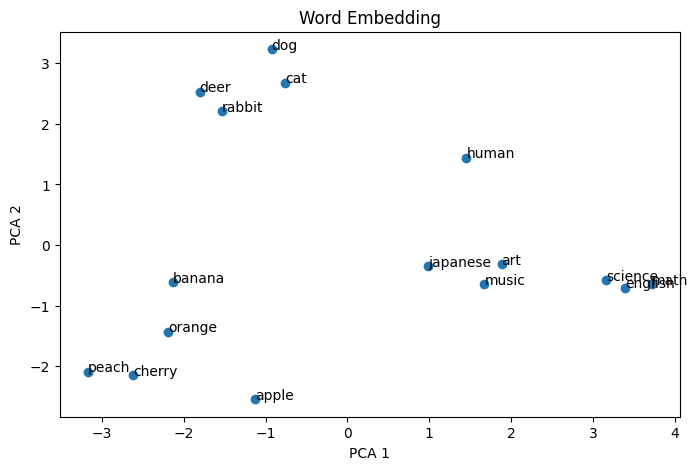

In [ ]:
# 可視化
plt.figure(figsize=(8,5))
plt.scatter(pca_X["pca_1"], pca_X["pca_2"]) # 散布図
for i, label in enumerate(word_list):
    plt.annotate(label, (pca_X["pca_1"].iloc[i], pca_X["pca_2"].iloc[i]))
plt.title("Word Embedding")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

似た意味を持つ単語同士は近くなり、逆に似ていない単語同士の距離は遠くなりました。<br>
したがって、単語の関係性をうまく表現することができました。

## 11.8. 近年の自然言語処理の手法

基本的な自然言語処理の考えなどを学んだところで、RNNやTransformer、BERT、GPTなどの近年の手法についても学んでいきましょう！最後には、BERTによる口コミの世代分類にも挑戦します！

### 11.8.1.  RNN（リカレントニューラルネットワーク）

2017年以前は、`RNN（Recurrent Neural Network）`系のモデルが自然言語処理における最先端技術でした。これらのアーキテクチャはネットワーク接続にフィードバックループを持ち、ある時刻から別の時刻へ情報を伝播させるため、テキストのような連続したデータのモデル化に理想的です。

RNNのアーキテクチャは、以下のようになります。図中の$x$が入力、$h$が(隠れ)状態、$y$が出力を表しています。また、□（黒い四角）はセルと呼ばれ、ここで処理が行われます。RNNの機構を一言で説明すると、「以前までの情報処理の結果$h^{(t-1)}$を受け取り、入力$x^{(t)}$と合わせて処理して、$y^{(t)}$を出力しつつ新しい情報処理の結果として$h^{(t)}$を次のセルに送ることでデータを逐次的に処理する機構」と言えます。

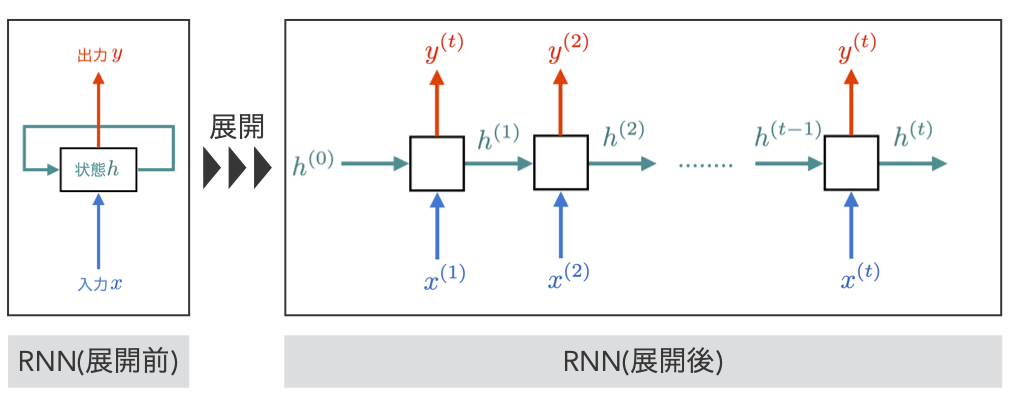
参考書籍 : [本質を捉えたデータ分析のための分析モデル入門｜ソシム](https://www.amazon.co.jp/%E6%9C%AC%E8%B3%AA%E3%82%92%E6%8D%89%E3%81%88%E3%81%9F%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E5%88%86%E6%9E%90%E3%83%A2%E3%83%87%E3%83%AB%E5%85%A5%E9%96%80-%E7%B5%B1%E8%A8%88%E3%83%A2%E3%83%87%E3%83%AB%E3%80%81%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%80%81%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E7%AD%89-%E7%94%A8%E9%80%94%E3%83%BB%E7%89%B9%E5%BE%B4%E3%81%8B%E3%82%89%E5%8E%9F%E7%90%86%E3%81%BE%E3%81%A7%E4%B8%80%E6%B0%97%E9%80%9A%E8%B2%AB-%E6%9D%89%E5%B1%B1%E8%81%A1/dp/4802613776/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=3VBTGVF7CN39M&keywords=%E5%88%86%E6%9E%90%E3%83%A2%E3%83%87%E3%83%AB&qid=1687158332&sprefix=%E5%88%86%E6%9E%90%E3%83%A2%E3%83%87%E3%83%AB%2Caps%2C252&sr=8-1)

自然言語処理におけるRNNは、トークンの単語IDを入力$x$として受け取り、それをセルに通して状態$h$を計算します。出力$y$は後述しますが、翻訳だったら別言語の単語ID、感情分析だったらポジティブ/ネガティブなど、タスクによって様々です。

* トークンのおさらい
  * 例) 「私」「は」「学校」「で」「数学」「を」「学び」「ます」「。」

  * → {私:0,　は:1,　学校:2,　で:3,　数学:4,　を:5,　学び:6,　ます:7,　。:8}

  * この例では、「私」「は」がトークン、「0」「1」が単語IDになります。

---
RNNは、自然言語処理、音声処理、時系列処理などに広く利用されてきました。
Andrej Karpathyのブログ記事に「[The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)」に、RNNの能力の詳しい解説が掲載されています。

RNNの課題として、勾配消失問題の発生が挙げられます。これは、情報を伝播していくうちに、過去の情報がだんだん抜け落ちていくイメージです。この問題に対処するため、LSTM(Long Short-Term Memory)やGRU()などの手法が提案されました。現在、「RNNの実装」というときは、実際はLSTMやGRUを指す場合が多いです。
LSTMやGRUの解説は、以下をご覧ください
* [直感で理解するLSTM・GRU入門 - 機械学習の基礎をマスターしよう！
｜AGIRobots](https://www.youtube.com/watch?v=PQgHhvub7zw)

* [【深層学習】LSTM - RNN に記憶をもたせる試みその2【ディープラーニングの世界 vol. 11 】](https://www.youtube.com/watch?v=oxygME2UBFc)


RNNが重要な役割を果たした分野の1つに、「ある言語の単語列を別の言語に対応づける」ことを目的とした機械翻訳システムの開発があります。この種のタスクは通常、エンコーダ・デコーダ（Encoder-Decoder）またはSeq2Seq（sequence-to-sequence）モデルで取り組まれ、入力と出力が両方とも任意の長さの系列である場合に適しています。エンコーダの仕事は、入力系列から与えられる情報を、最後の隠れ状態にエンコードすることです。この状態はデコーダに渡され、デコーダによって出力系列が生成されます。

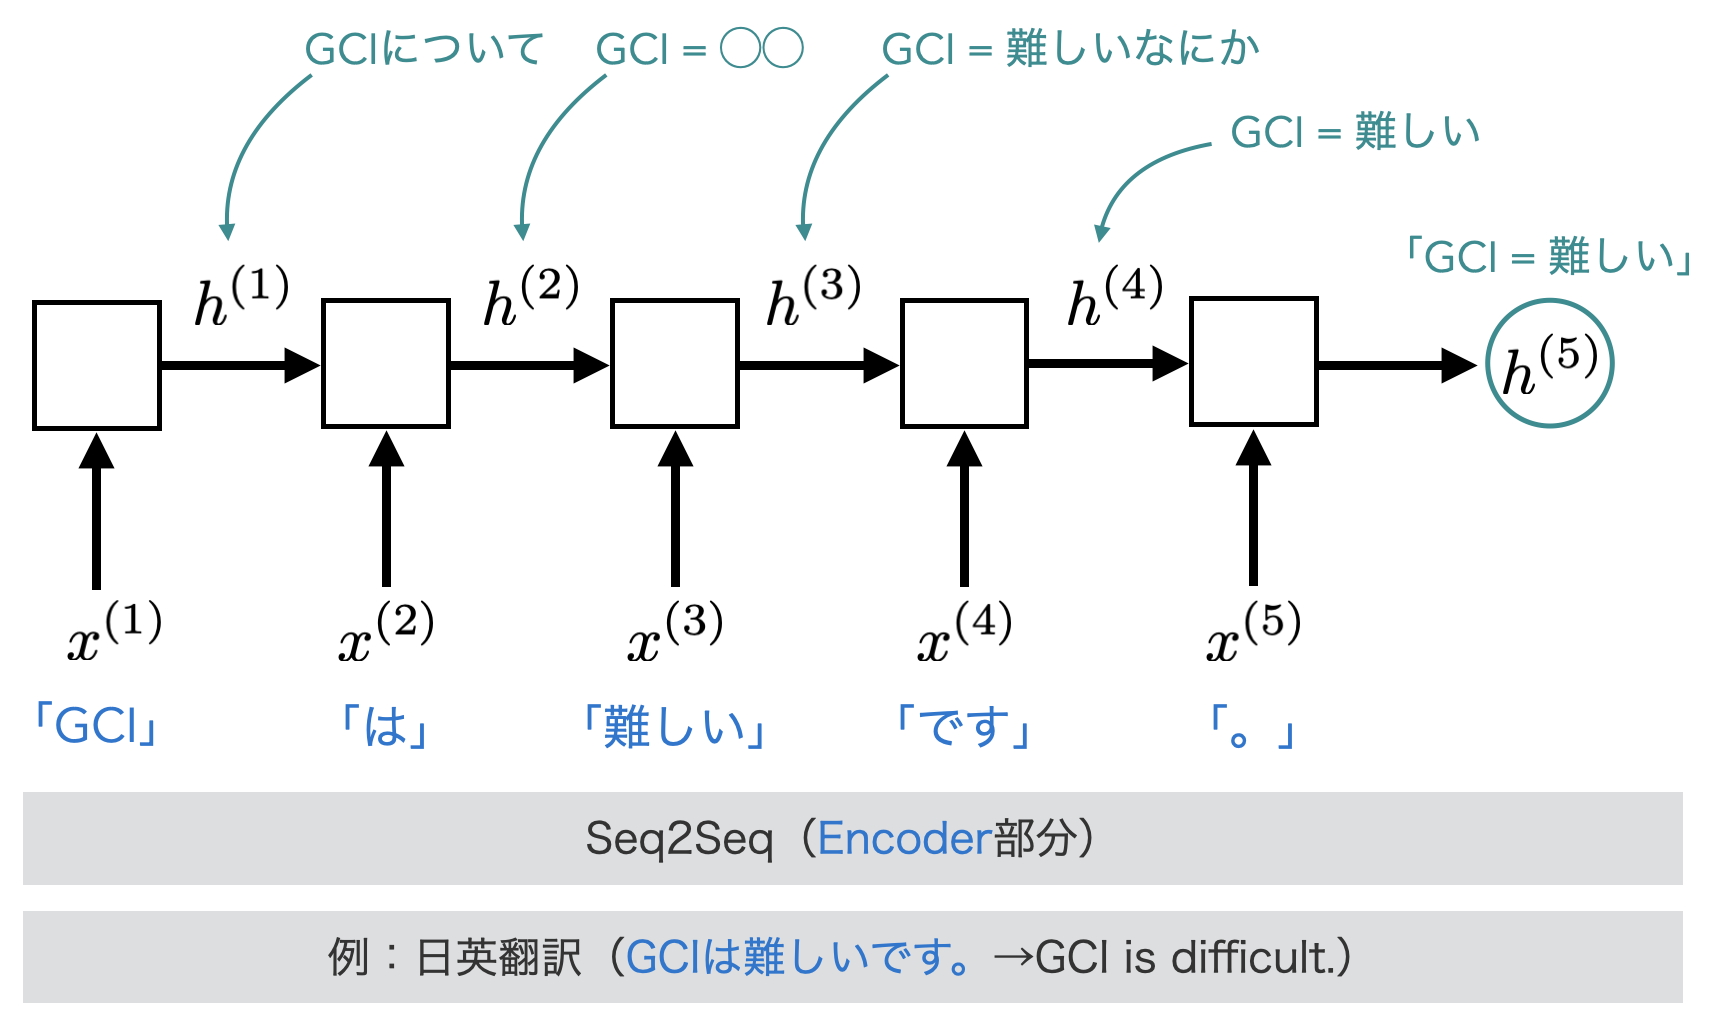

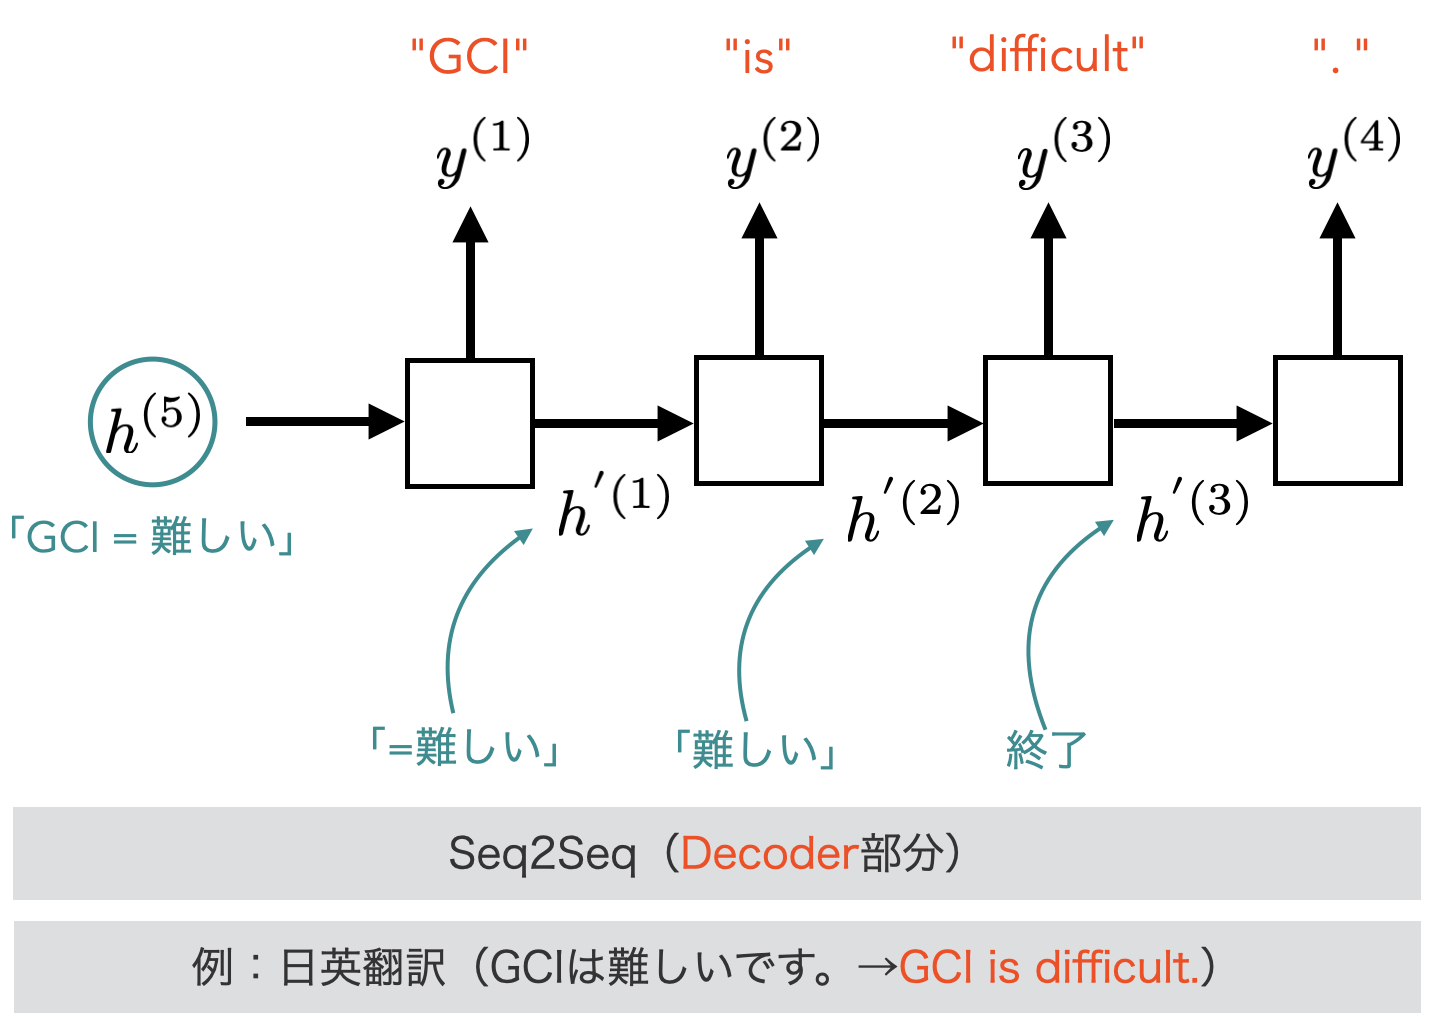

参考書籍：[機械学習エンジニアのためのTransformers｜オライリー](https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AETransformers-%E2%80%95%E6%9C%80%E5%85%88%E7%AB%AF%E3%81%AE%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%81%AB%E3%82%88%E3%82%8B%E3%83%A2%E3%83%87%E3%83%AB%E9%96%8B%E7%99%BA-Lewis-Tunstall/dp/4873119952)

---
Seq2Seqは、入力系列が長い場合は意味を伝播することが難しく、全ての情報を1つの表現に圧縮する過程で、系列の開始時点の情報が失われてしまうことがあります。この問題を解決するために、**Attention**機構が導入されました。Attentionによりデコーダがエンコーダの全ての隠れ情報にアクセスできるようにすることで、情報を有効に使用することを試みました。

(Seq2Seq + Attentionの論文：[Neural Machine Translation by Jointly Learning to Align and Translate
](https://arxiv.org/abs/1409.0473))

しかし、そもそもSeq2Seqモデルには、逐次的に計算が行われるため入力系列全体で並列化できないという問題があるため、GPUを用いた高速化の効果が薄くなってしまいます。

### 11.8.2. Transformer

2017年の「[Attention is All you Need](https://arxiv.org/pdf/1706.03762.pdf)」という論文でTransformerが提案されました。
Transformerは、再帰性を完全に排除して代わりにSelf-Attentionという機構を中心にしたアーキテクチャとなっています。
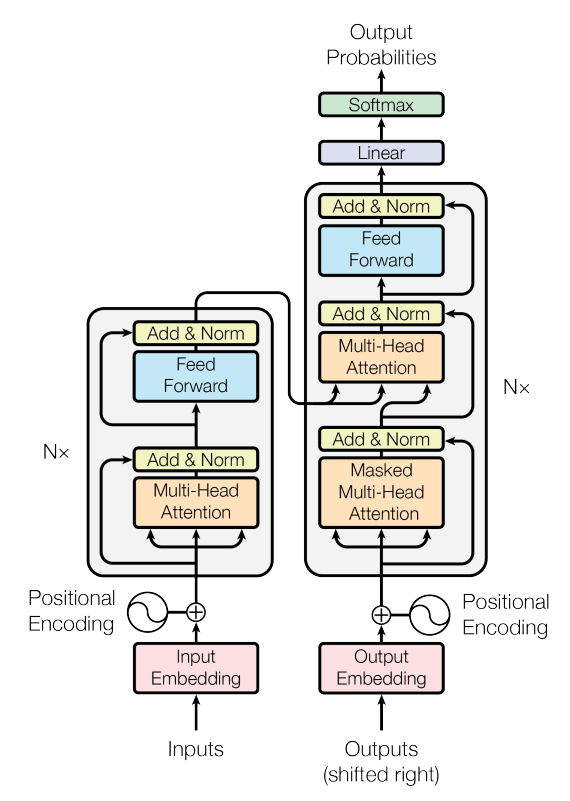

参照元：[Attention is All you Need](https://arxiv.org/pdf/1706.03762.pdf)

エンコーダとデコーダで構成されているところはRNNベースのSeq2Seqモデルと同じ構想ですが、エンコーダとデコーダがそれぞれSelf-Attention機構を持ち、その出力が順伝播型ニューラルネットワークに入力されています。このアーキテクチャにより、RNNベースのモデルよりも遥かに高速に学習することができ、深層学習における多くのブレークスルーのきっかけになりました。

Attention機構およびTransformerはわかりにくい概念ですが、解説記事や書籍は出回っているので、興味がある方はキャッチアップしてみてください。おすすめの解説動画・書籍を以下に挙げます。また、元の論文(Attention is All You Need)を読んでみるのも、非常に勉強になるはずです。

* 解説動画
  * [【速習！】Attentionから始めるTransformer超入門｜AGIRobots](https://www.youtube.com/watch?v=8Rrmub02fVg&list=WL&index=10&t=1985s)

  * [【深層学習】Attention - 全領域に応用され最高精度を叩き出す注意機構の仕組み【ディープラーニングの世界 vol. 24】｜AIcia Solid Project
](https://www.youtube.com/watch?v=bPdyuIebXWM)

  * [【深層学習】Transformer - Multi-Head Attentionを理解してやろうじゃないの【ディープラーニングの世界vol.28】｜AIcia Solid Project
](https://www.youtube.com/watch?v=50XvMaWhiTY&t=4s)

* 書籍
  * [機械学習エンジニアのためのTransformers｜オライリー](https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AETransformers-%E2%80%95%E6%9C%80%E5%85%88%E7%AB%AF%E3%81%AE%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%81%AB%E3%82%88%E3%82%8B%E3%83%A2%E3%83%87%E3%83%AB%E9%96%8B%E7%99%BA-Lewis-Tunstall/dp/4873119952)

  * [BERTによる自然言語処理入門: Transformersを使った実践プログラミング｜オーム社](https://www.amazon.co.jp/BERT%E3%81%AB%E3%82%88%E3%82%8B%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E5%85%A5%E9%96%80-Transformers%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%9F%E5%AE%9F%E8%B7%B5%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E3%82%B9%E3%83%88%E3%83%83%E3%82%AF%E3%83%9E%E3%83%BC%E3%82%AF%E6%A0%AA%E5%BC%8F%E4%BC%9A%E7%A4%BE/dp/427422726X/ref=sr_1_3?keywords=bert&qid=1687196261&s=books&sprefix=BERT%2Cstripbooks%2C283&sr=1-3)

  * [Vision Transformer入門｜技術評論社](https://www.amazon.co.jp/Vision-Transformer%E5%85%A5%E9%96%80-Computer-Library/dp/4297130580/ref=sr_1_1?keywords=vision+transformer&qid=1687196298&s=books&sprefix=vision+tran%2Cstripbooks%2C226&sr=1-1)

### 11.8.3. Transformerの派生モデル

Transformerの台頭により、さまざまな深層学習分野でブレークスルーが起こりました。以下の図を見ると、オリジナルのTransformer（Vanilla Transformer）からさまざまなモデルに派生していることがわかります。
- 自然言語処理の更なる進化（`BERT`、`GPT`）
 - 赤、紫、緑、濃い青、薄い青、黄土色、クリーム色
- 画像処理（`Vision Transformer`）
 - 黄色
- 画像生成（`DALL-E`、`Imagen`）
  - 空色、オレンジ色、Imagen
- ロボティクス（`Gato`）
 - 白の一部


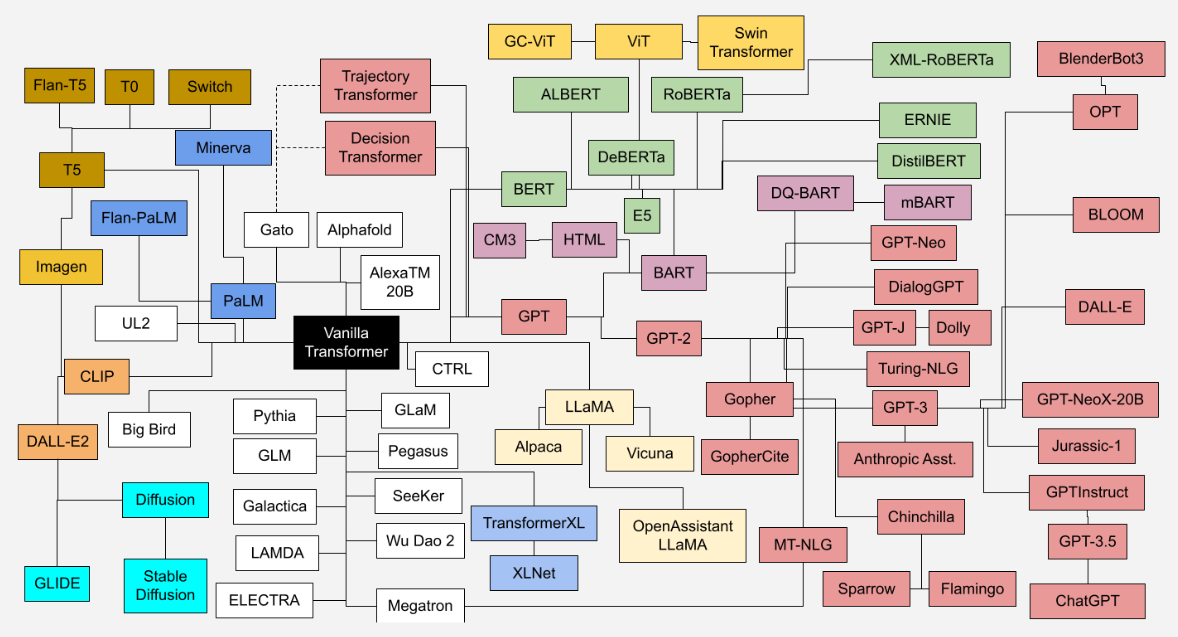

参照元：[Transformer models: an introduction and catalog — 2023 Edition](https://amatriain.net/blog/transformer-models-an-introduction-and-catalog-2d1e9039f376/)

上図のモデルは、全てが2017年以降のモデルですが、どのモデルにもTransformerが使われています。図ではオレンジ色で表されている「DALL-E2」や空色の「Stable Diffusion」、赤色の「ChatGPT」などのAIに詳しくなくても聞いたことがあるようなモデルにもTransformerが使われていることから、その影響力の凄さが伺えます。

#### 11.8.3.1. 事前学習済みモデルとファインチューニング

前述の通り、Transformerによってさまざまな機械学習分野が発展していきました。
ここからは、自然言語タスクに戻って説明していきます。

Transformerアーキテクチャは、もともと機械翻訳のような系列変換タスクのために設計されました。
しかし、その後すぐに、エンコーダとデコーダの両ブロックは独立したモデルとして適応されるようになりました。
Transformerには何百種類ものモデルがありますが、そのほとんどは次の3種類のどれかに属しています。

1. エンコーダのみ
  -  入力された一連のテキストを、テキスト分類や固有表現認識といったタスクに適した豊かな数値表現に変換するモデルです。BERTやRoBERTa、DistilBERTのようなBERT系のモデルは、このクラスのアーキテクチャに属しています。このアーキテクチャでは、与えられたトークンに対して計算される表現が、左（トークンの前）と右（トークンの後）の両方のコンテキストに依存します。

2. デコーダのみ
  - プロンプトテキストが与えられると、これらのモデルは最も可能性の高い次の単語を繰り返し予測することによって系列を補完します。GPT系のモデルはこのクラスに属します。このアーキテクチャでは、与えられたトークンに対して計算される表現は、左の文脈のみ依存します。

3. エンコーダ・デコーダ
  - あるテキストから別のテキストへの複雑なマッピングをモデル化するために使用されます。機械翻訳や要約といったタスクに適しています。オリジナルのTransformerアーキテクチャのほか、BARTやT5がこのクラスに属します。

#### 11.8.3.1.1. BERT

BERTは、2018年にGoogleから発表されたモデルです。
実務でも多く使われているモデルであり、Transformer時代の到来を告げたモデルでもあります。発表当時、GLUEベンチマークにおいて、どの最先端のモデルより優れた結果を出しました。

（BERTの論文 : [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
）

---
BERTのアーキテクチャは、主にTransformerのエンコーダー部分から構成されています。アーキテクチャとしてはそれほど新規性はありませんが、その学習方法と利用方法に特徴があります。

BERTの学習では、大規模データで事前学習した後、タスクに応じてファインチューニングする手法が用いられています。これが非常に強力で、巨大なデータセットや大量の資源がなくとも、BERTの事前学習済みモデルを数10分 ~ 数時間ファインチューニングすれば、自分の解きたいタスクを解いてくれる高精度なモデルが手に入ります。これだけで解決できる課題もあり、「とりあえずBERTを試す」という方針はビジネスにおいても強力な選択肢となります。本講義でもこの後、実際にBERTのファインチューニングを行います。



#### 11.8.3.1.2. GPT

GPTも、オリジナルのモデルは2018年に発表されました。
名前からも推測できる通り、ChatGPTを開発したOpenAIによるモデルです。
モデルのアーキテクチャはTransformerのデコーダー部分から構成されています。

（GPTの論文：[Improving Language Understanding by Generative Pre-Training](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf)）

特に、2020年に発表されたGPT-3が非常に話題となりました。1,750億パラメータを持つこのモデルの性能は凄まじく、言葉で支持したデザインの通りのWebサイトのコーディングができたり、掲示板にて気づかれることなく人間と数ヶ月会話したり、GPT-3が書いたブログがランキングのトップを取ったりと、非常に幅広い能力を良い見せつけました。

（GPT-3の論文：[Language Models are Few-Shot Learners](https://arxiv.org/pdf/2005.14165.pdf)）

GPT-3の特徴の1つが、Few-Shot Learningという概念です。
GPT-3では、もはやファインチューニングを行うことなく、様々なタスクに対応できます。
例えば、 GPT-3に翻訳タスクを実行させる場合は「日本語から英語に翻訳してください。『これはペンです』→"This is a pen"、『今日は晴れです』→」のようにタスクの説明、例、解きたい問題の順に入力すれば、"It is sunny today"という出力を得ることが期待できます。例の個数が複数あればFew-Shot、1つの時はOne-Shot、ない場合はZero-Shotと言います。ちなみに、昨今ではChatGPTの出力をコントロールするために、Few-ShotやOne-Shotはよく使われます。ChatGPTに普通に質問する際はZero-Shotとなりますが、事例を与えることで精度の向上や、回答の安定化が図れます。

## 11.9. BERTによる感情分析


本講義の最後に、近年のNLP手法であるBERTを使ったデータ解析をしてみましょう!
今回は、最終課題のデータセットの1つでもある**ホットペッパービューティー（HPB）**を使用します。

今回取り組むのは、「口コミの世代分類」です。ユーザーからの口コミやアンケート結果を分析する機会は多いと思います。今回はチュートリアルのため、簡単にして「低評価口コミにおける10代ユーザーと40代ユーザーの分類」を行います。

Hugging Faceを使って、東北大学の乾研究室が出している学習済み日本語BERTを使います。




本演習では、新しく以下のライブラリを用います。
* `PyTorch`
  * 代表的な深層学習ライブラリ。
* `PyTorch-Lightning`
  * PyTorchにて、モデルの構築及び学習をより速く、効率的に使うためのライブラリ。
* `HuggingFace`
 * さまざまな学習済みの機械学習モデルやデータセットなどが公開されており、「transformers」をインストール・インポートすることで使える。

#### ライブラリのインストール

In [ ]:
# HuggingFaceを使うには、transformersをインストールする。
# MeCab用の辞書もインストールが必要。
!pip install transformers -q
!pip install rhoknp ipadic unidic_lite fugashi unidic sudachipy -q
!pip install pytorch-lightning -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 88.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 40.7 MB/s eta 0:0

#### 口コミ投稿者の世代分類

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings
import random
import glob
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
from transformers import BertJapaneseTokenizer, BertForSequenceClassification
import pytorch_lightning as pl

warnings.simplefilter('ignore')

それでは、HPBの口コミデータを読み込み、簡単に確認してみましょう。

In [ ]:
path = "/content/drive/MyDrive/HPB/"
names = ['店舗ID','レビューID','スタイリストID','メンバーID','ニックネーム','性別','世代','レビュー内容','ムードポイント','サービスポイント','テクニックポイント','メニューポイント','総合ポイント','投稿日']
df_review = pd.read_table(path + 'ReviewData_rev.tsv', names=names)

In [ ]:
df_review.head(2)

,店舗ID,レビューID,スタイリストID,メンバーID,ニックネーム,性別,世代,レビュー内容,ムードポイント,サービスポイント,テクニックポイント,メニューポイント,総合ポイント,投稿日
0,19661a1cbca82c7c000ad65e0b5b69bc,23f58e3551e3032a507216b40555ed46,b3f122adce7b2febc84f66e67917d9ee,a587c31204347111f4d7d4d5c543b400,ｍａｉ,F,4,先日は、ありがとうございました！今回カットで伺いましたが、毛量を調整して頂きスッキリし、動き...,5,5,5,5,5,13-07-27
1,cdd01374c8027292d967708f4816d97f,2e810d4ed8a3dab44e155bd6e9eeea00,893f8a6a49593da54c050be8e4414ca5,231bea509f4fbe8351f8d818c9989730,あずきちゃん,F,5,雰囲気が良くて、スタッフさんたちもアットホーム感があってすごくよかったです。髪の性質などを細...,5,5,5,4,5,13-07-27


見てみるとわかる通り、このデータはサロンでの施術に対するレビュー内容や、施術に対する評価（ムードポイント、サービスポイント、テクニックポイント、メニューポイント、総合ポイント）などが記載されています。

ここで、「世代」というカラムに注目すると、数値型のデータが格納されています。これは、データセットの説明PDFを確認すると、[1 : 〜10代前半, 2 : 10代後半, 3 : 20代前半, 4 : 20代後半, 5 : 30代前半, 6 : 30代後半, 8 : 40代, 9 : 50代, 10 : 60代, 11 : 70代〜]という対応関係になっています。辞書を作っておき、数値を文字列に変換します。

In [ ]:
# 対照表
generation_dict = {1:'〜10代前半', 2:'10代後半', 3:'20代前半', 4:'20代後半', 5:'30代前半',
                   6:'30代後半', 8:'40代', 9:'50代', 10:'60代', 11:'70代〜'}

In [ ]:
# 世代カラムを文字列型に変換
df_review['世代'] = df_review['世代'].apply(lambda x : generation_dict[x])
df_review_10and40 = df_review[df_review['世代'].str.match('.*10代.*|.*40代.*')]

また、総合ポイントをみると、1~5の5段階評価となっています。このうち、本演習では低評価の口コミ（= 総合ポイントが3以下）のユーザーに絞って分析を行ってみます。

In [ ]:
df_review_low_rating_10and40 = df_review_10and40[df_review_10and40['総合ポイント']<=3].reset_index(drop=True)

In [ ]:
# 「10代前半」と「10代後半」をまとめて「10代」として扱う
def convert_teeneger(x):
  if re.match('10代後半', x):
    return '10代'
  elif re.match('〜10代前半', x):
    return '10代'
  else:
    return '40代'
df_review_low_rating_10and40['世代'] = df_review_low_rating_10and40['世代'].apply(convert_teeneger)

In [ ]:
df_review_low_rating_10and40.head(1)

,店舗ID,レビューID,スタイリストID,メンバーID,ニックネーム,性別,世代,レビュー内容,ムードポイント,サービスポイント,テクニックポイント,メニューポイント,総合ポイント,投稿日
0,ed74c82bf1cbf4a3c4cee1f5ac14a01b,904c009cafc7a09715879087aeaf14e9,576b811d20bd07bebd0bed8f09c15bda,e5bb5ef30e0b9810fd71e760e3c1d990,フィル,F,40代,縮毛矯正で予約をし、クーポンでかなり安くはなりましたが、トリートメントなどを追加したので、結...,3,1,5,3,3,13-07-26


これで、データの準備は完了しました。続いて、BERT関連のコードに入ります。

In [ ]:
# トークナイザー：東北大，乾研の事前学習モデル
tokenizer_name = 'cl-tohoku/bert-base-japanese-whole-word-masking'
# モデル：東北大のだとモデリングに時間がかかったため，DIstilBERTの日本語Verを使う
model_name = "bandainamco-mirai/distilbert-base-japanese"

In [ ]:
category_list = [
    '10代',
    '40代'
]

# 学習済みモデルを、トークナイザーとして用いる
tokenizer = BertJapaneseTokenizer.from_pretrained(tokenizer_name)
max_length = 256
dataset_for_loader = []

for label, category in enumerate(tqdm(category_list)):
  text_list = df_review_low_rating_10and40[df_review_low_rating_10and40['世代']==category_list[label]]['レビュー内容'].tolist()
  for text in text_list:
    encoding = tokenizer(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True
    )
    encoding['labels'] = label
    encoding = {k : torch.tensor(v) for k,v in encoding.items()}
    dataset_for_loader.append(encoding)

100%|██████████| 2/2 [00:05<00:00,  2.58s/it]


続いて、データセットの分割を行います。今回は、学習データが6割、検証データが2割、テストデータが2割で分割しています。

In [ ]:
#データセットの分割
random.shuffle(dataset_for_loader)
n = len(dataset_for_loader)
n_train = int(0.6*n)
n_val = int(0.2*n)
dataset_train = dataset_for_loader[:n_train]
dataset_val = dataset_for_loader[n_train:n_train+n_val]
dataset_test = dataset_for_loader[n_train + n_val:]

dataloader_train = DataLoader(
    dataset_train, batch_size=32, shuffle=True
)
dataloader_val = DataLoader(dataset_val, batch_size=256)
dataloader_test = DataLoader(dataset_test, batch_size=256)

次に、BERTの実行で使うクラスを定義します。最適化関数の設定や、学習・検証・テストの各ステップでの処理などを書きます。

In [ ]:
class BertForSequenceClassification_pl(pl.LightningModule):
  def __init__(self, model_name, num_labels, lr):
    super().__init__()
    self.save_hyperparameters()

    self.bert_sc = BertForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_labels
    )


  def training_step(self, batch, batch_idx):
    output = self.bert_sc(**batch)
    loss = output.loss
    self.log('train_loss', loss)
    return loss

  def validation_step(self, batch, batch_idx):
    output = self.bert_sc(**batch)
    val_loss = output.loss
    self.log('val_loss', val_loss)

  def test_step(self, batch, batch_idx):
    labels = batch.pop('labels')
    output = self.bert_sc(**batch)
    labels_predicted = output.logits.argmax(-1)
    num_correct = (labels_predicted == labels).sum().item()
    accuracy = num_correct/labels.size(0)
    self.log('accuracy', accuracy)

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

今回ファインチューニングしたモデルを実務で使う際は、重みを保存しておくと、再度訓練する必要がなくなり、便利です。以下のコードでは、Google Drive上のディレクトリを指定して、重みの保存方法を指定しています。

In [ ]:
checkpoint = pl.callbacks.ModelCheckpoint(
    monitor='val_loss',
    mode='min',
    save_top_k=1,
    save_weights_only=True,
    dirpath = path,
)

trainer = pl.Trainer(
    #gpus=1, #エラー
    max_epochs=10,
    callbacks=[checkpoint]
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
model = BertForSequenceClassification_pl(
    model_name, num_labels=2, lr=1e-5
)
trainer.fit(model, dataloader_train, dataloader_val)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at bandainamco-mirai/distilbert-base-japanese were not used when initializing BertForSequenceClassification: ['vocab_layer_norm.bias', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.2.attention.v_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.bias', 'distilbert.transformer.layer.4.attention.out_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.weight', 'distilbert.transformer.layer.2.attention.k_lin.weight', 'distilbert.transformer.layer.5.ffn.lin2.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.2.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.1.sa_layer_norm.weight', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.1.ffn.lin1.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', '

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=lightning_logs/

In [ ]:
best_model_path = checkpoint.best_model_path # ベストモデルのファイル
print('ベストモデルのファイル: ', checkpoint.best_model_path)
print('ベストモデルの検証データに対する損失: ', checkpoint.best_model_score)

ベストモデルのファイル:  /content/drive/MyDrive/HPB/epoch=8-step=882-v1.ckpt
ベストモデルの検証データに対する損失:  tensor(0.4430, device='cuda:0')


In [ ]:
test = trainer.test(dataloaders=dataloader_test)
print(f'Accuracy: {test[0]["accuracy"]:.2f}')

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/HPB/epoch=8-step=882-v1.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/HPB/epoch=8-step=882-v1.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.8162679672241211     │
└───────────────────────────┴───────────────────────────┘

Accuracy: 0.82


In [ ]:
model = BertForSequenceClassification_pl.load_from_checkpoint(
    best_model_path
)
model.bert_sc.save_pretrained(path)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at bandainamco-mirai/distilbert-base-japanese were not used when initializing BertForSequenceClassification: ['vocab_layer_norm.bias', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.2.attention.v_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.bias', 'distilbert.transformer.layer.4.attention.out_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.weight', 'distilbert.transformer.layer.2.attention.k_lin.weight', 'distilbert.transformer.layer.5.ffn.lin2.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.2.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.1.sa_layer_norm.weight', 'distilber

# Appendix

In [ ]:
# こっちの方が本編より厚くなる勢いで

## 演習：LSTM

### 事前準備

In [ ]:
import random
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchtext.legacy.data import Field, LabelField, TabularDataset, BucketIterator, Iterator
from torch.nn.utils.rnn import pack_padded_sequence

seed = 123
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

device = "cpu"
if torch.cuda.is_available():
  device = "cuda"

print(device)

cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_path = "/content/drive/MyDrive/松尾研講座系/My_GCI_items/GCI_WINTER_2021/NLP-comp/dataset/IMDB_Dataset_train.csv"
test_path = "/content/drive/MyDrive/松尾研講座系/My_GCI_items/GCI_WINTER_2021/NLP-comp/dataset/IMDB_Dataset_test.csv"
result_path = "/content/drive/MyDrive/松尾研講座系/My_GCI_items/GCI_WINTER_2021/NLP-comp/dataset/output/"

###データセットの読み込み

In [ ]:
label_dic = {"negative":0, "positive":1}
label_str = list(label_dic.keys())

TEXT = Field(tokenize='spacy', include_lengths=True, batch_first=True)
LABEL = Field(preprocessing=lambda k: label_dic[k], is_target=True, sequential=False, use_vocab=False,)
train_dataset = TabularDataset(
                path=train_path, format='csv',
                fields=[('text', TEXT),
                        ('label', LABEL)])

test_dataset = TabularDataset(
                path=test_path, format='csv',
                fields=[('text', TEXT)])

TEXT.build_vocab(train_dataset, min_freq=2)

train_dataset, val_dataset = train_dataset.split(split_ratio = 0.8)

In [ ]:
print(train_dataset)

In [ ]:
def load_dataset(train, val, test, batch_size, device):
  train_iter = BucketIterator(dataset=train, batch_size=batch_size, device=device,
              repeat=False, sort_key=lambda x: len(x.text), train=True)
  val_iter = BucketIterator(dataset=val, batch_size=batch_size, device=device,
            repeat=False, sort_key=lambda x: len(x.text), train=True)
  test_iter = Iterator(dataset=test, batch_size=batch_size, device=device,
              repeat=False, train=False, sort=False, sort_within_batch=False, sort_key=False)

  return train_iter, val_iter, test_iter

In [ ]:
# iterator内のデータ構成確認
batch_size = 4
train_iter, val_iter, test_iter = load_dataset(train_dataset, val_dataset, test_dataset, batch_size, device)

for i in range(5):
  batch = next(iter(train_iter))
  print(f"--------- Sample {i} ----------")
  print("label: ", batch.label)
  print("text: ", batch.text)
  print(batch.text[0].shape)

--------- Sample 0 ----------
label:  tensor([0, 0, 0, 1])
text:  (tensor([[ 2752,   833,     3,  ...,     1,     1,     1],
        [ 1403,   253,   820,  ..., 38084,    14,     4],
        [   11,   231,     2,  ...,     1,     1,     1],
        [   66,    21,    19,  ...,     1,     1,     1]]), tensor([133, 266, 145, 194]))
torch.Size([4, 266])
--------- Sample 1 ----------
label:  tensor([1, 1, 1, 0])
text:  (tensor([[  56,   15,   62,  ...,   34,  238,    4],
        [ 855, 8217,  432,  ...,    1,    1,    1],
        [  56,   75,    9,  ...,    1,    1,    1],
        [ 366,   13,   11,  ...,    1,    1,    1]]), tensor([575, 238,  64, 379]))
torch.Size([4, 575])
--------- Sample 2 ----------
label:  tensor([1, 0, 0, 0])
text:  (tensor([[ 1913,  6105,     7,  ...,     1,     1,     1],
        [   66,    21,    73,  ...,     1,     1,     1],
        [   11,   226,   399,  ...,    99,    39,    39],
        [ 7804,    15, 32037,  ...,     1,     1,     1]]), tensor([277,  77, 4

### モデル定義

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = 2
        self.padding_idx = padding_idx
        self.dropout = 0.3

        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.lstm = nn.LSTM(bidirectional=True, num_layers=self.num_layers,
                    input_size=embedding_dim, hidden_size=hidden_dim,
                    dropout=self.dropout,batch_first=True)

        # ここあとで使おうかな
        self.fc_block = nn.Sequential(nn.Linear(hidden_dim*2, round(hidden_dim/4)),
                                      nn.ReLU(),
                                      nn.Dropout(self.dropout),
                                      nn.Linear(round(hidden_dim/4), output_dim),
                                      nn.Sigmoid())

    def forward(self, inputs):
        inputs_text = inputs[0] # inputs = (sentence(batch size * max length), sentence lengths)
        inputs_length = inputs[1].cpu() # sentence lengths

        embedded = self.embeddings(inputs_text)
        packed_embedded = pack_padded_sequence(embedded, inputs_length, enforce_sorted=False, batch_first = True) # 系列長を整える

        _, hidden_next = self.lstm(packed_embedded)
        bilstm_out = torch.cat([hidden_next[0][0], hidden_next[0][1]], dim=1)
        output = self.fc_block(bilstm_out)

        return output.squeeze()

    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_dim)
        return hidden.to(device)

### 学習・テスト用関数の定義

In [ ]:
def train(model, optimizer, loss_function, train_iter, val_iter, threshold)):
  for epoch in range(num_epochs):
      train_loss, train_acc = 0.0, 0.0
      fin_iteration = len(train_iter)
      print(f"================== EPOCH {epoch+1} ==========================")

      model.train()
      for iteration, batch in enumerate(train_iter):
          optimizer.zero_grad()
          output = model(batch.text)
          loss = loss_function(output, batch.label.float())
          train_loss += loss.item()
          output_bi = (output >=  torch.Tensor([threshold]).to(device)).float()
          acc = (output_bi== batch.label).sum()
          train_acc += acc.item()
          loss.backward()
          optimizer.step()

          if iteration%100==0:
              print(f'Iteration: {iteration}/{fin_iteration}, Train [Loss: {loss.item()/batch_size:.4f}, Accuracy: {acc.item()/batch_size:.3f}]')

      avg_train_loss = train_loss / (len(train_iter.dataset))
      avg_train_acc = train_acc / (len(train_iter.dataset))

      model.eval()
      with torch.no_grad():
          val_loss, val_acc = 0.0, 0.0
          for batch in val_iter:
              output = model(batch.text)
              loss = loss_function(output, batch.label.float())
              val_loss += loss.item()
              output_bi = (output >=  torch.Tensor([threshold]).to(device)).float()
              acc = (output_bi== batch.label).sum()
              val_acc += acc.item()
          avg_val_loss = val_loss / (len(val_iter.dataset))
          avg_val_acc = val_acc / (len(val_iter.dataset))

      print('EPOCH: {}, Train [Loss: {:.4f}, Accuracy: {:.3f}], Valid [Loss: {:.4f}, Accuracy: {:.3f}]'.format(
          epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc))

def predict(model, test_iter, threshold):
    y_pred = []
    cnt = 0
    model.eval()
    with torch.no_grad():
      for batch in test_iter:
          y = model(batch.text)
          y_bi = (y >=  torch.Tensor([threshold]).to(device)).float()
          y_pred += y_bi.tolist()

    submission = pd.Series(y_pred, name='label')
    submission.to_csv(result_path+'submission.csv', header=False, index=False)
    print("saved!")

def token2text(tokens, TEXT):
    texts = []
    for token in tokens:
        text = TEXT.vocab.itos[token]
        if text != "<pad>":
            texts.append(text + ' ')
        else:
            break
    return "".join(texts)

SyntaxError: ignored

### 学習・テストの実施

In [ ]:
vocab_size = len(TEXT.vocab)
embedding_dim = 512
hidden_dim = 256
output_dim = 1
threshold = 0.5
batch_size = 16

train_iter, val_iter, test_iter = load_dataset(train_dataset, val_dataset, test_dataset, batch_size, device)
model = LSTM(vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx).to(device)
loss_function = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001, amsgrad=True)

num_epochs = 2

In [ ]:
train(model, optimizer, loss_function, train_iter, val_iter, threshold)

==================EPOCH 1==========================
Iteration: 0/2000, Train [Loss: 0.0440, Accuracy: 0.375]
Iteration: 100/2000, Train [Loss: 0.0437, Accuracy: 0.438]
Iteration: 200/2000, Train [Loss: 0.0412, Accuracy: 0.625]
Iteration: 300/2000, Train [Loss: 0.0429, Accuracy: 0.562]
Iteration: 400/2000, Train [Loss: 0.0396, Accuracy: 0.688]
Iteration: 500/2000, Train [Loss: 0.0373, Accuracy: 0.875]
Iteration: 600/2000, Train [Loss: 0.0386, Accuracy: 0.812]
Iteration: 700/2000, Train [Loss: 0.0449, Accuracy: 0.562]
Iteration: 800/2000, Train [Loss: 0.0367, Accuracy: 0.750]
Iteration: 900/2000, Train [Loss: 0.0436, Accuracy: 0.500]
Iteration: 1000/2000, Train [Loss: 0.0425, Accuracy: 0.625]
Iteration: 1100/2000, Train [Loss: 0.0270, Accuracy: 0.812]
Iteration: 1200/2000, Train [Loss: 0.0275, Accuracy: 0.875]
Iteration: 1300/2000, Train [Loss: 0.0214, Accuracy: 0.938]
Iteration: 1400/2000, Train [Loss: 0.0375, Accuracy: 0.625]
Iteration: 1500/2000, Train [Loss: 0.0276, Accuracy: 0.812]


In [ ]:
predict(model, test_iter, threshold)

saved!


### Validation結果の可視化

In [ ]:
# 可視化
n = 5 # n < batch_size
model.eval()
batch = next(iter(val_iter))
predicts = model(batch.text)
predicts = torch.round(predicts)
for i in range(n):
    tokens = batch.text[0][i, :]
    print("input text: {}".format(token2text(tokens, TEXT)))
    t = int(batch.label[i].item())
    print("answer label: {}".format(label_str[t]))
    y = 1 if predicts[i].item() >= threshold else 0
    print(f"predicted label: {label_str[y]} ({t==y})\n")

input text: This film , for what it was set out to be , succeeded . It 's a short tragic film . Although my choice of film are ones that really develop characters and their relationships , this film is meant to just give a taste , leaving you with the " what happens next " factor . After watching it , I really was wanting more , more of the characters back story , what influences they had to make them into the people they were . I think that s what the makers intended the viewing audience to think . The acting is amazing . There are n't many lines in the film so their body language , facial expressions , and overall presence needed to be powerful enough to withhold a scene . Both Franco and Miner have that element and it shows . For them ( especially Franco ) to take the time to make this , obviously says they believed in this film and wanted to be apart of it and for that , I appreciated the film for what it was . Also I 'm happy I own it so I can share it with other people that would